In [1]:
#Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import json
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import HTML
import folium
from wordcloud import WordCloud, STOPWORDS

from scipy.misc import imread

import nltk

In [2]:
unitedTweets = pd.read_csv('/home/theresa/Desktop/DataSets/UnitedTweets/AllUnitedTweetsClean.csv')
list(unitedTweets)
#shows names of the dataframe's columns

['created_at', 'text', 'CleanText']

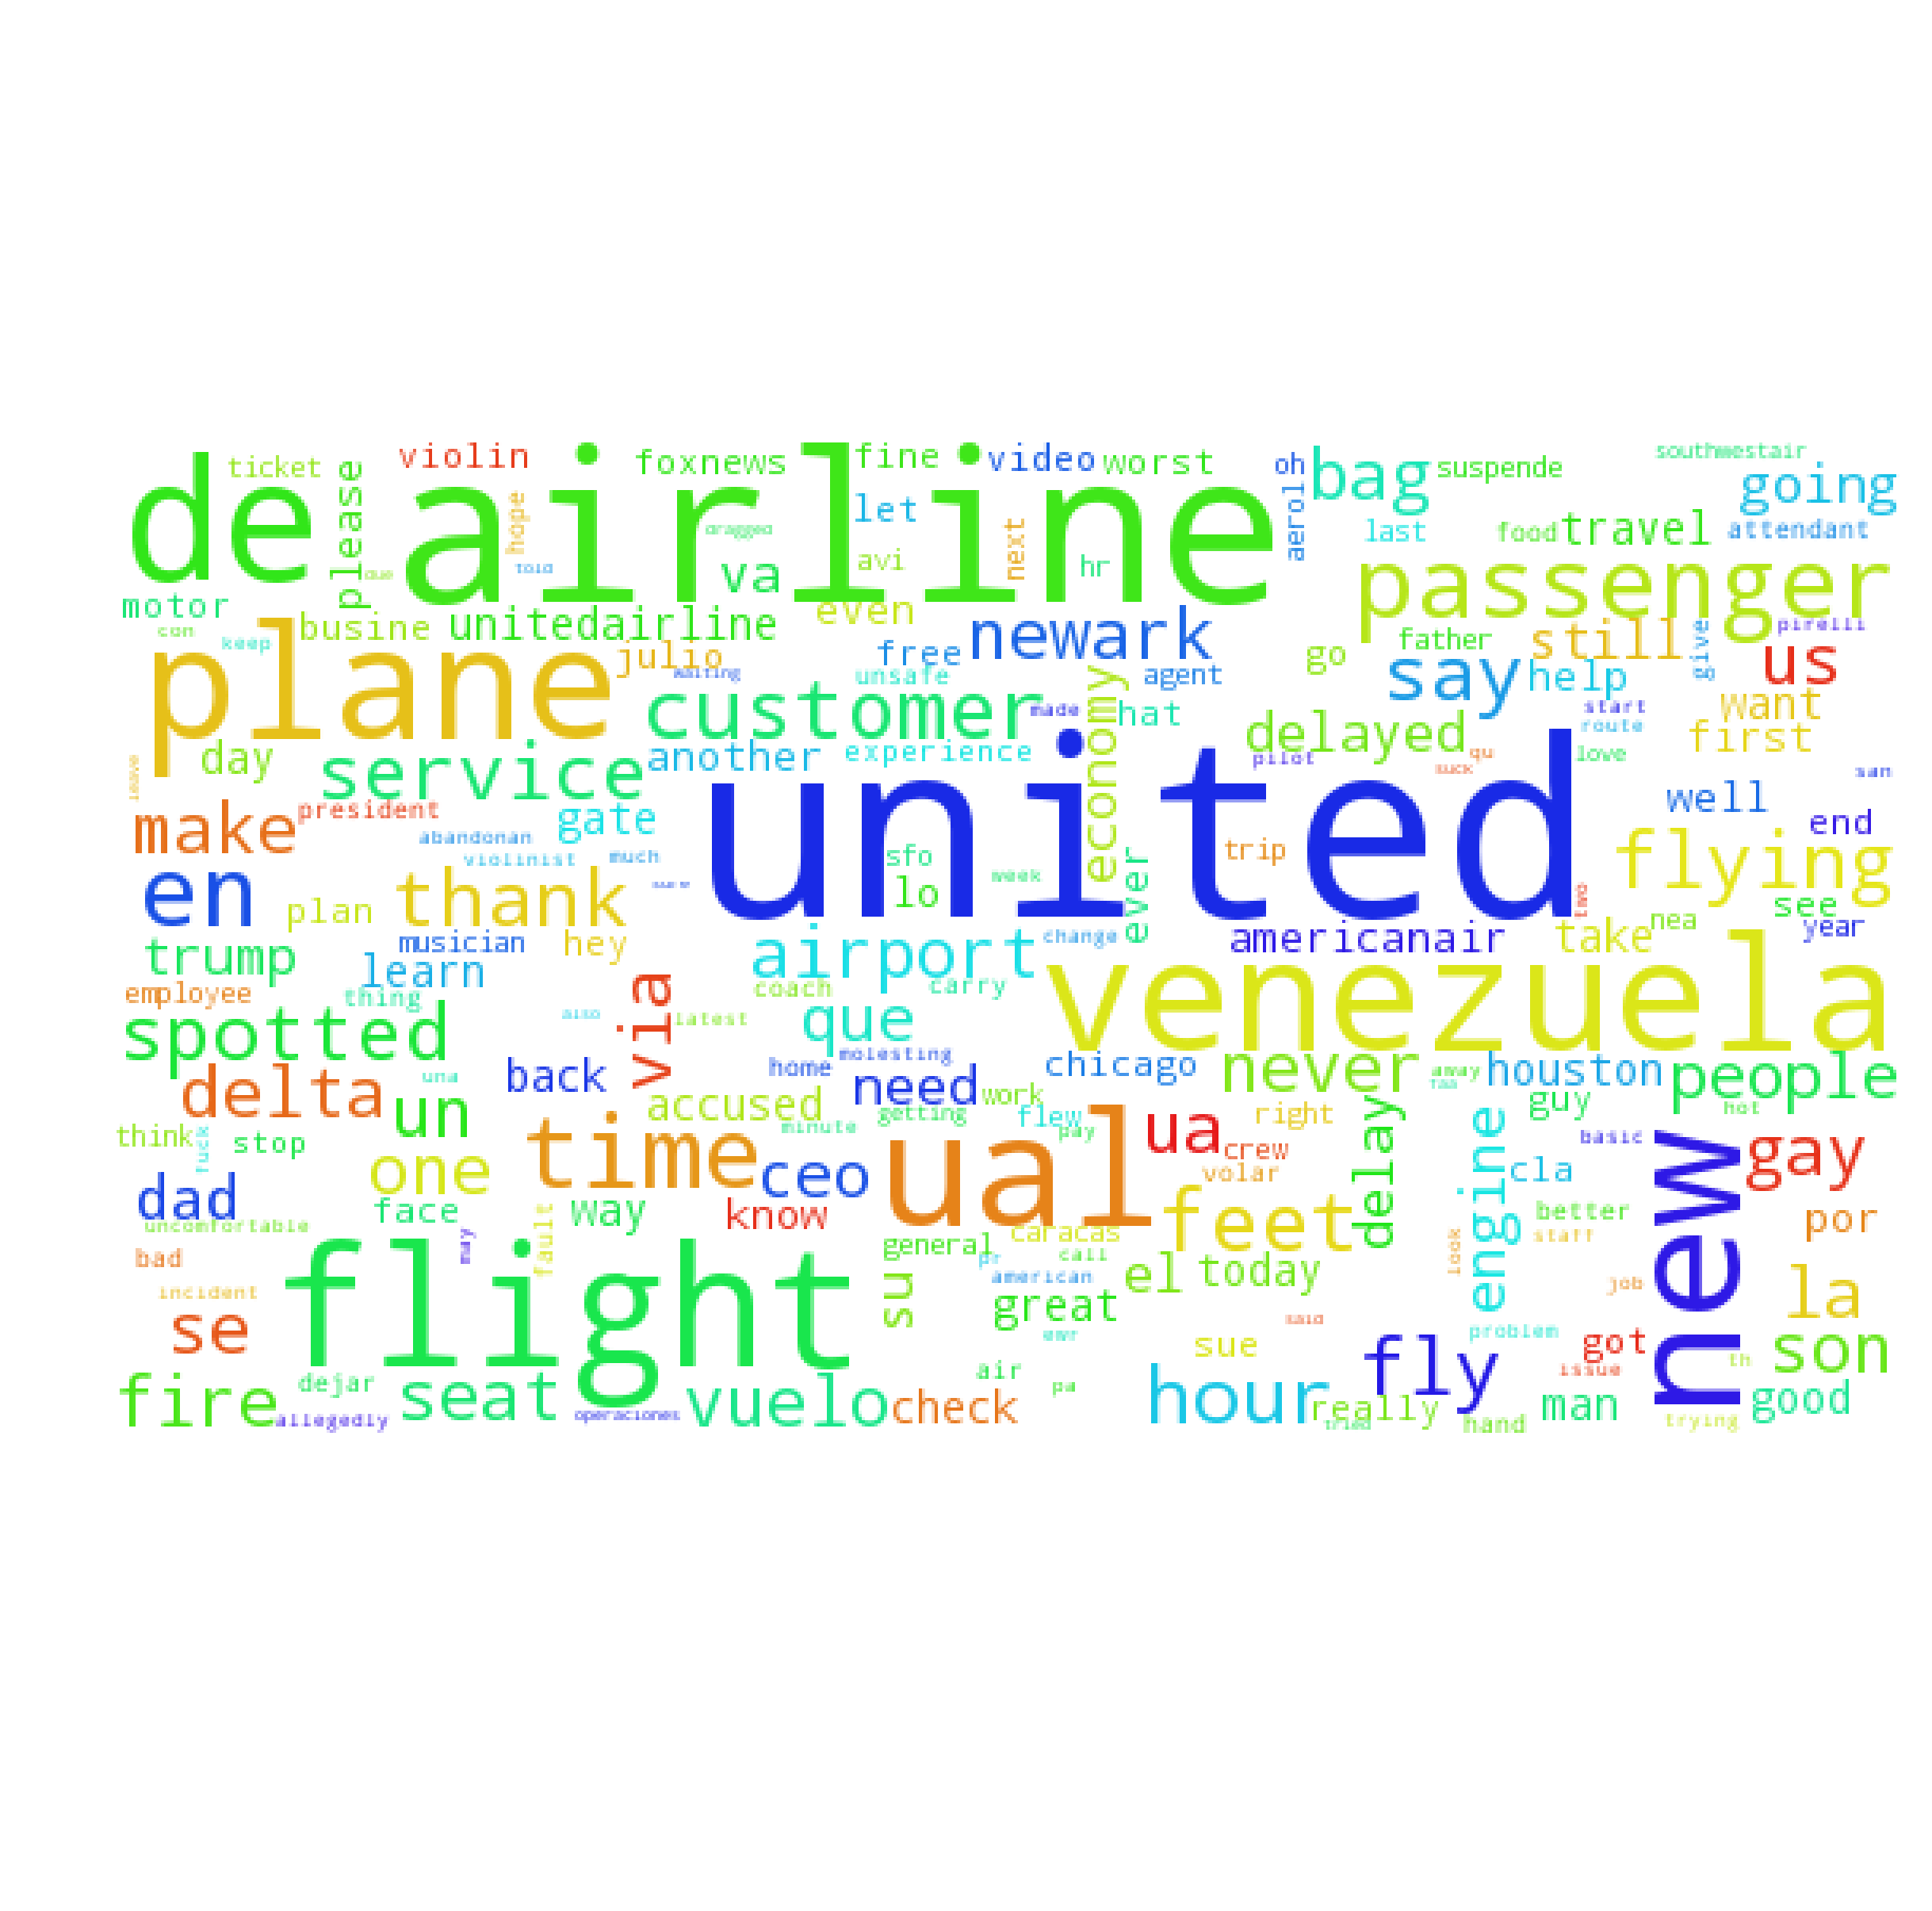

In [4]:
# join tweets to a single string
words = ' '.join(unitedTweets['CleanText'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
twitter_mask = imread('/home/theresa/horse_race.png')  #I deleted Devkar's Flatten=True to make sure array version
#of image was of the correct type (needs to be an unsigned int between 0 and 255)



plt.figure(num=None, figsize=(15, 10), dpi=300)
wordcloud = WordCloud(
                      #font_path='/Library/Fonts/Arial.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('twitter_derby.png', dpi=300, bbox_inches='tight')
plt.show()

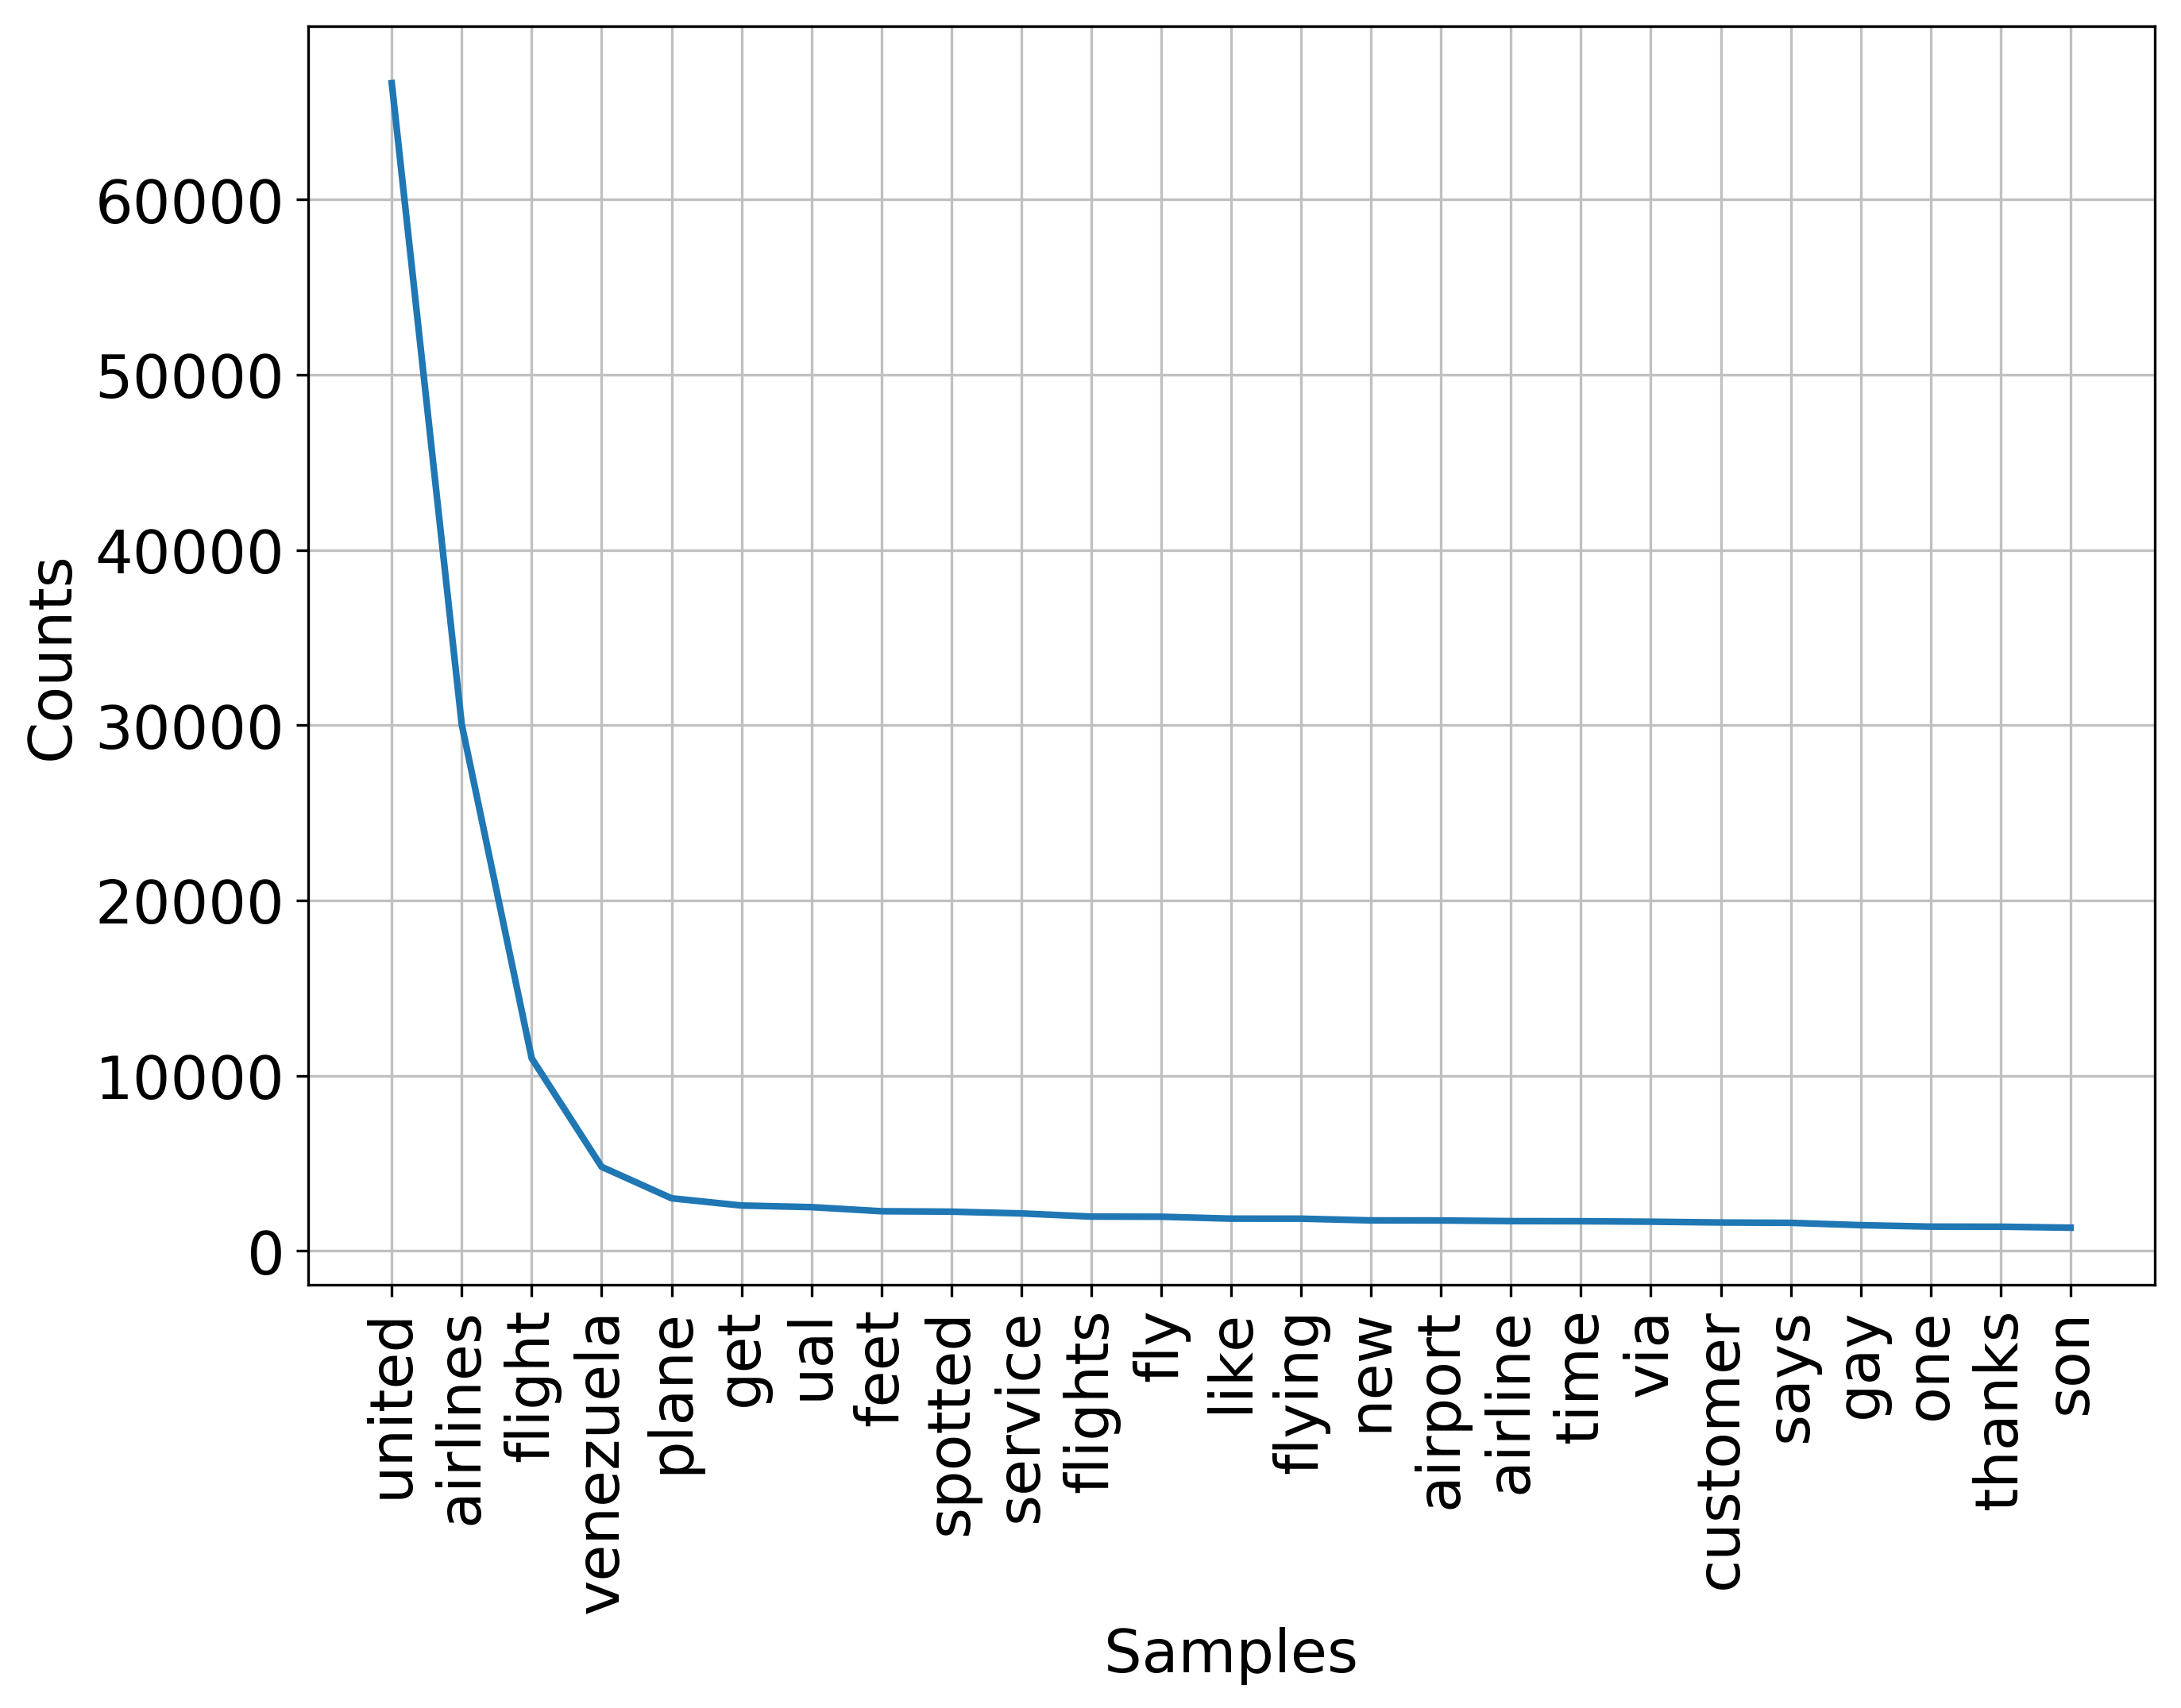

In [5]:
# Tokenize into words
tokens = []
for tweet in unitedTweets['CleanText']:
    for word in nltk.word_tokenize(tweet):
        if len(word)>2:
            tokens.append(word)
freq_dist = nltk.FreqDist(tokens)
plt.figure(num=None, figsize=(10, 7), dpi=300)
plt.xlabel('Common Words')
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)


fig1 = plt.gcf()

freq_dist.plot(25)
fig1.tight_layout()

fig1.savefig('UnitedTweets_frequency_distr.png', dpi=300)


